In [1]:
#import library yang ingin digunakan
#citation
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np

In [2]:
#ekstrak data txt
data = open ("D:/KULIAH/Data Observasi/tempat olah/ngc5460/data ngc5460/fotometringc5460timeseries.txt","r")
x = data.readlines()
for i in range (len(x)):
    x[i]=x[i].split()

jd_utc = []
hjd_utc = []
rel_flux_t1 = []
rel_flux_c2 = []
rel_flux_c3 = []
rel_flux_t1_err = []
rel_flux_c2_err = []
rel_flux_c3_err = []

In [3]:
#memasukkan data
#lihat variabel yang dipanggil pada list txt
for i in range (len(x)):
    jd_utc.append(float(x[i][0]))
    hjd_utc.append(float(x[i][1]))
    rel_flux_t1.append(float(x[i][2]))
    rel_flux_c2.append(float(x[i][3]))
    rel_flux_c3.append(float(x[i][4]))
    rel_flux_t1_err.append(float(x[i][5]))
    rel_flux_c2_err.append(float(x[i][6]))
    rel_flux_c3_err.append(float(x[i][7]))

In [4]:
#mengubah data menjadi dataframe dengan pandas
d = {'Time (JD UTC)': jd_utc, 'Time (HJD UTC)': hjd_utc, 'rel flux t1': 2.5 * np.log10(rel_flux_t1),
     'rel flux c2': 2.5 * np.log10(rel_flux_c2), 'rel flux c3': 2.5 * np.log10(rel_flux_c3), 'rel flux err t1': rel_flux_t1_err,
     'rel flux err c2': rel_flux_c2_err, 'rel flux err c3': rel_flux_c3_err }
df = pd.DataFrame(d)
df

,Time (JD UTC),Time (HJD UTC),rel flux t1,rel flux c2,rel flux c3,rel flux err t1,rel flux err c2,rel flux err c3
0,2.459730e+06,2.459730e+06,-6.204703,0.148446,-0.148445,0.000100,0.001979,0.001505
1,2.459730e+06,2.459730e+06,-6.252502,0.154463,-0.154463,0.000100,0.001990,0.001497
2,2.459730e+06,2.459730e+06,-6.379007,0.140810,-0.140810,0.000099,0.001963,0.001514
3,2.459730e+06,2.459730e+06,-6.339149,0.141907,-0.141907,0.000098,0.001964,0.001513
4,2.459730e+06,2.459730e+06,-6.288539,0.136945,-0.136945,0.000100,0.001957,0.001521
...,...,...,...,...,...,...,...,...
856,2.459729e+06,2.459729e+06,-6.449285,0.126627,-0.126626,0.000106,0.001779,0.001409
857,2.459729e+06,2.459729e+06,-6.184798,0.131969,-0.131969,0.000111,0.001821,0.001428
858,2.459729e+06,2.459729e+06,-6.252502,0.170600,-0.170600,0.000106,0.001843,0.001346
859,2.459729e+06,2.459729e+06,-6.267750,0.141748,-0.141749,0.000104,0.001781,0.001371


In [5]:
for i in df.index:
    t_jd = df['Time (JD UTC)']
    t_hjd = df['Time (HJD UTC)']
    flux_t1 = df['rel flux t1']
    flux_c2 = df['rel flux c2']
    flux_c3 = df['rel flux c3']
    flux_err_t1 = df['rel flux err t1']
    flux_err_c2 = df['rel flux err c2']
    flux_err_c3 = df['rel flux err c3']

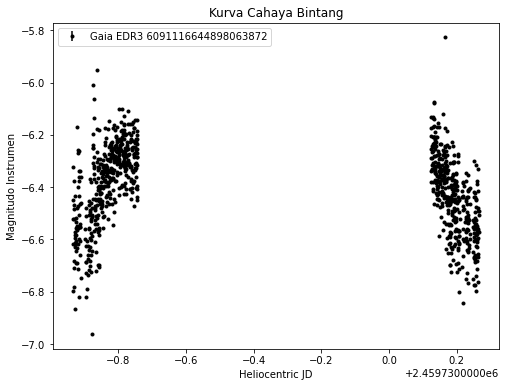

In [6]:
#plotting data
plt.figure(figsize=(8,6))
plt.errorbar(t_hjd,flux_t1,yerr=flux_err_t1,fmt='k.',label='Gaia EDR3 6091116644898063872')
#plt.errorbar(t_hjd,(flux_c2)-1.125,yerr=flux_err_c2,fmt='c.',label='HD 123202')
#plt.errorbar(t_hjd,(flux_c3)-1.0,yerr=flux_err_c3,fmt='b.',label='HD 123226')
plt.legend(loc= 'best')
plt.title("Kurva Cahaya Bintang")
plt.xlabel("Heliocentric JD")
plt.ylabel("Magnitudo Instrumen")
plt.show()

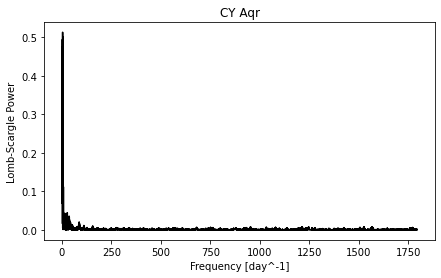

In [7]:
from astropy.timeseries import LombScargle
import astropy.units as u
ls = LombScargle(t_hjd,flux_t1,flux_err_t1)
frequency, power = ls.autopower()
plt.figure(figsize=(7,4))
plt.title('CY Aqr')
plt.xlabel('Frequency [day^-1]')
plt.ylabel('Lomb-Scargle Power')
plt.plot(frequency, power,'k')  

Best frequency: 3.4176549382534422 [1/day] 
 or 
Best period: 0.2925982927085787 [days]


Text(-5, 5, 'Period = 0.292598 days')

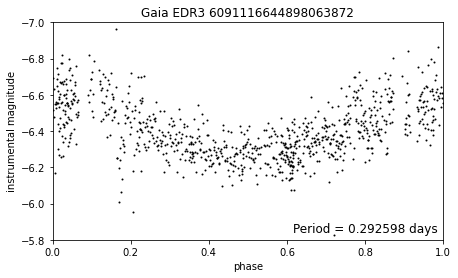

In [8]:
period = 1/frequency

best_frequency = frequency[np.argmax(power)]
best_period = period[np.argmax(power)]

print(f"Best frequency: {best_frequency} [1/day] \n or \nBest period: {best_period} [days]")
lit_period = best_period
phase_star = ((t_hjd-t_hjd[len(t_hjd)//2]) % lit_period) / lit_period
tlipat = (t_hjd % best_period)
plt.figure(figsize=(7,4))
plt.errorbar(phase_star, flux_t1, fmt="k.", markersize=2)
plt.ylabel("instrumental magnitude")
plt.xlabel("phase")
plt.xlim(0, 1)
plt.ylim(-5.8,-7.0)
plt.title("Gaia EDR3 6091116644898063872")
plt.annotate("Period = {0:.6f} days".format(lit_period), xy=(1, 0), xycoords="axes fraction",
    xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,
)

The fit period is  0.2925983 days
The fit semi amplitude is    0.15382


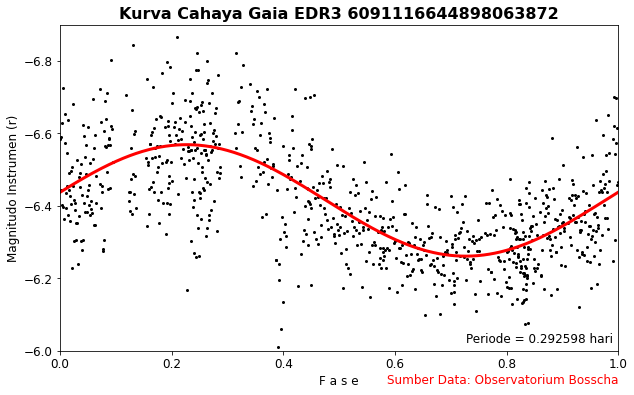

In [27]:
periode = lit_period
print("The fit period is %10.7f days" % periode)
# calculate model fit based on period 
tfit = np.linspace(0,periode,1000)
lcfit = LombScargle(t_hjd,flux_t1,flux_err_t1).model(tfit,best_frequency)
K = 0.5*(np.max(lcfit)-np.min(lcfit))
print("The fit semi amplitude is %10.5f" % K)
# phase the data and plot it with the fit
fig,ax = plt.subplots(figsize=(10,6))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.plot(tlipat/periode,flux_t1, ".k", markersize=4)
ax.plot(tfit/periode,lcfit,"-r",linewidth=3)
ax.text(1, -0.1, 'Sumber Data: Observatorium Bosscha',color='red',ha='right',transform=ax.transAxes)
plt.annotate("Periode = {0:.6f} hari".format(lit_period), xy=(1, 0), xycoords="axes fraction",
    xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,)
plt.title('Kurva Cahaya Gaia EDR3 6091116644898063872',fontsize=16,fontweight='bold',ha='center')
plt.xlabel('F a s e',fontsize=12)
plt.ylabel('Magnitudo Instrumen (r)',fontsize=12)
plt.xlim(0,1)
plt.ylim(-6.0, -6.9)
#plt.grid()
plt.show()

In [10]:
data2 = pd.read_excel('D:/KULIAH/Kerja Praktek/gaiaedr3fromcatalog.xlsx')
df2 = pd.DataFrame(data2)
df2

,julian date,magnitude
0,1734.399113,14.917548
1,1734.575261,14.687550
2,1734.649265,14.885479
3,1829.187598,14.563956
4,1849.187934,14.573342
5,1849.261975,14.737051
6,1880.495538,14.901577
7,2004.170412,14.593585
8,2004.244414,14.831610
9,2028.670054,14.878306


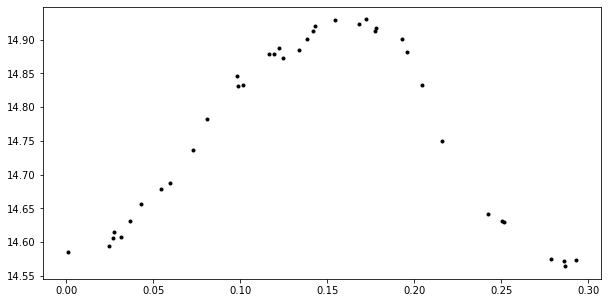

In [11]:
t_jd = data2['julian date']
magcat = data2['magnitude']
freq = 3.4009498596126093
periodcat = 1/freq
t = t_jd % periodcat
plt.figure(figsize=(10,5))
plt.plot(t, magcat, 'k.')

Periode = 0.2940355022211079 hari = 7.05685205330659 jam


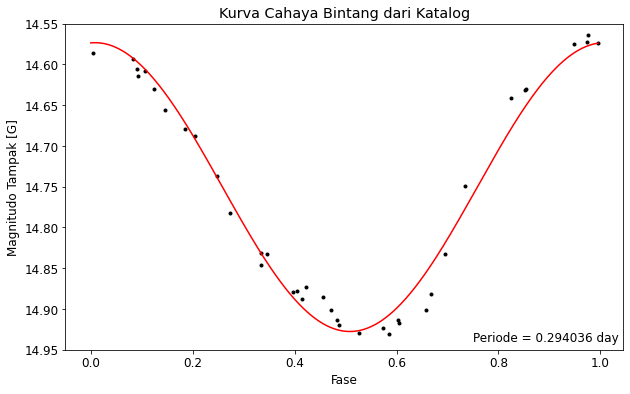

In [28]:
tfit2 = np.linspace(0,periode,1000)
lcfit2 = LombScargle(t,magcat).model(tfit2,freq)
print(f"Periode = {periodcat} hari = {periodcat*24} jam")
fig,ax = plt.subplots(figsize=(10,6))
for label in (ax.get_xticklabels() + ax.get_yticklabels()):
    label.set_fontsize(12)
ax.plot(t/periodcat,magcat, ".k")
ax.plot(tfit2/periodcat,lcfit2,"-r",linewidth=1.5)
plt.annotate("Periode = {0:.6f} day".format(periodcat), xy=(1, 0), xycoords="axes fraction",
    xytext=(-5, 5), textcoords="offset points", ha="right", va="bottom", fontsize=12,)
plt.title('Kurva Cahaya Bintang dari Katalog')
plt.xlabel('Fase')
plt.ylabel('Magnitudo Tampak [G]')
plt.ylim(14.95,14.55)
plt.show()